# Import packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob
import os

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Read and preprocess dataset

In [3]:
# 将图片编号补全成五位以便与标签对应(00001-70000)
# import os
 
# path =r'D:\ML data\dataset\ZC_dataset_3DCP\20210803\crack\Inputpicture_withorder'
# file_list = os.listdir(path)
 
# for file in file_list:
#     # 补0 9表示补0后名字共9位
#     filename = file.zfill(9)
#     # print(filename)
#     new_name = ''.join(filename)
#     os.rename(path + '\\' + file, path + '\\' + new_name)

In [4]:
img_path = glob.glob(r'D:\ML data\dataset\ZC_dataset_3DCP\20210803\crack\Inputpicture_withorder\*.bmp')

len(img_path)

70110

In [5]:
# data_sscurve = np.loadtxt(r'D:\ML data\dataset\ZC_dataset_3DCP\20210726\samenumber0_70000Unsame_1.txt',dtype='float',delimiter=' ')
# data_sscurve.shape

In [6]:
data_sscurve = pd.read_csv(r'D:\ML data\dataset\ZC_dataset_3DCP\20210803\crack\3DCP_ld_00001_70000.csv',header=None)
data_sscurve

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,1,0,0.001170,0.002340,0.003510,0.004680,0.005850,0.007020,0.008190,0.009361,...,0.017226,0.017226,0.017226,0.017226,0.017226,0.017226,0.017226,0.017226,0.017226,0.017226
1,2,0,0.001093,0.002186,0.003279,0.004373,0.005466,0.006559,0.007652,0.008745,...,0.009644,0.009644,0.009644,0.009644,0.009644,0.009644,0.009644,0.009644,0.009644,0.009644
2,3,0,0.001037,0.002074,0.003111,0.004148,0.005185,0.006222,0.007259,0.008296,...,0.005753,0.005753,0.005753,0.005753,0.005753,0.005753,0.005753,0.005753,0.005753,0.005753
3,4,0,0.001068,0.002135,0.003203,0.004270,0.005338,0.006405,0.007473,0.008540,...,0.008225,0.008225,0.008225,0.008225,0.008225,0.008225,0.008225,0.008225,0.008225,0.008225
4,5,0,0.001047,0.002093,0.003140,0.004187,0.005233,0.006280,0.007327,0.008373,...,0.008290,0.008290,0.008290,0.008290,0.008290,0.008290,0.008290,0.008290,0.008290,0.008290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70105,70106,0,0.000965,0.001929,0.002894,0.003858,0.004823,0.005788,0.006752,0.007717,...,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366,-0.002366
70106,70107,0,0.001162,0.002325,0.003487,0.004649,0.005811,0.006974,0.008136,0.009298,...,0.017172,0.017172,0.017172,0.017172,0.017172,0.017172,0.017172,0.017172,0.017172,0.017172
70107,70108,0,0.001017,0.002034,0.003052,0.004069,0.005086,0.006103,0.007121,0.008138,...,0.009794,0.009794,0.009794,0.009794,0.009794,0.009794,0.009794,0.009794,0.009794,0.009794
70108,70109,0,0.001108,0.002216,0.003324,0.004432,0.005540,0.006648,0.007756,0.008864,...,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501


In [7]:
# data_sscurve1 = data_sscurve[:,1:]
data_sscurve.shape

(70110, 502)

In [8]:
img_path[15000:15010]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15001.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15002.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15003.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15004.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15005.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15006.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15007.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15008.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15009.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\15010.bmp']

In [9]:
data_sscurve[15000:15010]

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
15000,15001,0,0.001156,0.002312,0.003467,0.004623,0.005779,0.006935,0.008091,0.009246,...,0.011612,0.011612,0.011612,0.011612,0.011612,0.011612,0.011612,0.011612,0.011612,0.011612
15001,15002,0,0.000838,0.001676,0.002514,0.003352,0.004190,0.005028,0.005866,0.006704,...,0.013062,0.013062,0.013062,0.013062,0.013062,0.013062,0.013062,0.013062,0.013062,0.013062
15002,15003,0,0.001269,0.002537,0.003806,0.005075,0.006343,0.007612,0.008880,0.010149,...,0.013902,0.013902,0.013902,0.013902,0.013902,0.013902,0.013902,0.013902,0.013902,0.013902
15003,15004,0,0.001163,0.002327,0.003490,0.004653,0.005817,0.006980,0.008144,0.009307,...,0.011045,0.010990,0.010934,0.010879,0.010824,0.010769,0.010714,0.010658,0.010645,0.010645
15004,15005,0,0.000912,0.001825,0.002737,0.003650,0.004562,0.005475,0.006387,0.007300,...,0.006839,0.006839,0.006839,0.006839,0.006839,0.006839,0.006839,0.006839,0.006839,0.006839
15005,15006,0,0.001222,0.002443,0.003665,0.004886,0.006108,0.007329,0.008551,0.009773,...,0.013540,0.013540,0.013540,0.013540,0.013540,0.013540,0.013540,0.013540,0.013540,0.013540
15006,15007,0,0.000989,0.001978,0.002967,0.003956,0.004946,0.005935,0.006924,0.007913,...,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562,0.014562
15007,15008,0,0.001148,0.002296,0.003444,0.004592,0.005739,0.006887,0.008035,0.009183,...,0.021292,0.021292,0.021292,0.021292,0.021292,0.021292,0.021292,0.021292,0.021292,0.021292
15008,15009,0,0.000916,0.001832,0.002747,0.003663,0.004579,0.005495,0.006410,0.007326,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
15009,15010,0,0.001016,0.002033,0.003049,0.004065,0.005081,0.006097,0.007114,0.008130,...,0.011164,0.011164,0.011164,0.011164,0.011164,0.011164,0.011164,0.011164,0.011164,0.011164


In [10]:
SSC = data_sscurve
SSC.shape

(70110, 502)

In [11]:
data_sscurve.max(), data_sscurve.min()

(0      70110.000000
 1          0.000000
 2          0.001518
 3          0.003037
 4          0.004555
            ...     
 497        0.053320
 498        0.053320
 499        0.053320
 500        0.053320
 501        0.053320
 Length: 502, dtype: float64,
 0      1.000000
 1      0.000000
 2      0.000520
 3      0.001040
 4      0.001559
          ...   
 497   -0.008954
 498   -0.008954
 499   -0.008954
 500   -0.008954
 501   -0.008954
 Length: 502, dtype: float64)

In [12]:
# SSC_train = data_sscurve[:16000].values
# SSC_val = data_sscurve[16000:].values
# SSC_train.shape

## Dimensionality reduction using PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
Y = SSC.iloc[:,1:].values
Y.shape

(70110, 501)

(0.0, 502.0)

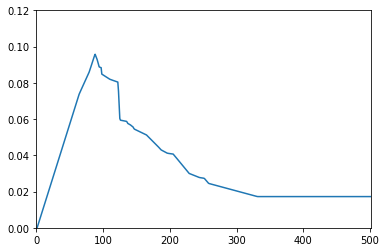

In [15]:
# plt.figure(figsize=(16,9))
plt.plot(np.arange(501)+1,Y[0])
plt.ylim(0,0.12)
plt.xlim(0,502)

In [16]:
pca=PCA(n_components=50)#实例化
pca=pca.fit(Y)#拟合模型
Y_dr=pca.transform(Y)#获取降维后的新矩阵
Y11 = pca.inverse_transform(Y_dr)

In [17]:
Y_dr.shape,Y11.shape

((70110, 50), (70110, 501))

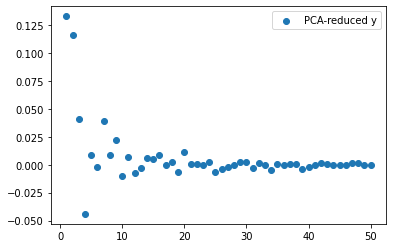

In [18]:
# plt.figure(figsize=(15,9))
plt.scatter(np.arange(50)+1, Y_dr[0],label='PCA-reduced y')
plt.legend()

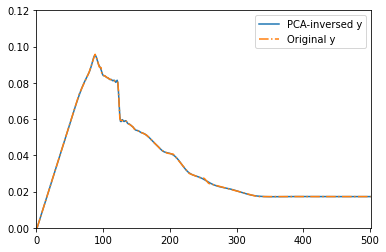

In [19]:
# plt.figure(figsize=(15,9))
plt.plot(np.arange(501)+1, Y11[0],label='PCA-inversed y')
plt.plot(np.arange(501)+1,Y[0],'-.',label='Original y')

plt.ylim(0,0.12)
plt.xlim(0,502)
# plt.xticks(np.arange(40)+1)
plt.legend()
# plt.grid(axis='x',color='grey',which='both',linestyle='--',linewidth='1')

In [20]:
EVR = pca.explained_variance_ratio_
EVR

array([5.61809471e-01, 1.78082587e-01, 9.14194763e-02, 5.11400128e-02,
       3.09201618e-02, 2.02512365e-02, 1.38184015e-02, 9.95006272e-03,
       7.31521035e-03, 5.59235858e-03, 4.35280392e-03, 3.43688211e-03,
       2.78213329e-03, 2.27135010e-03, 1.90146019e-03, 1.58890772e-03,
       1.35775143e-03, 1.15554102e-03, 9.89160873e-04, 8.59612896e-04,
       7.47353311e-04, 6.59153598e-04, 5.87228921e-04, 5.14762705e-04,
       4.63099477e-04, 4.16046031e-04, 3.74987830e-04, 3.36934052e-04,
       3.02977441e-04, 2.75256298e-04, 2.52812318e-04, 2.31286094e-04,
       2.10002111e-04, 1.94743106e-04, 1.79217224e-04, 1.67500161e-04,
       1.53383033e-04, 1.42143213e-04, 1.32806865e-04, 1.23021918e-04,
       1.14793545e-04, 1.08576853e-04, 1.01183915e-04, 9.50067018e-05,
       8.89268371e-05, 8.40389825e-05, 7.78471074e-05, 7.35765515e-05,
       6.94125709e-05, 6.57816325e-05])

In [21]:
Total_EVR = pca.explained_variance_ratio_.sum()
Total_EVR

0.9983384427697074

<ipython-input-22-bbdc2e161d34>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(1+np.arange(50),np.cumsum(pca.explained_variance_ratio_),"r",MarkerSize=5,LineWidth=3.0)


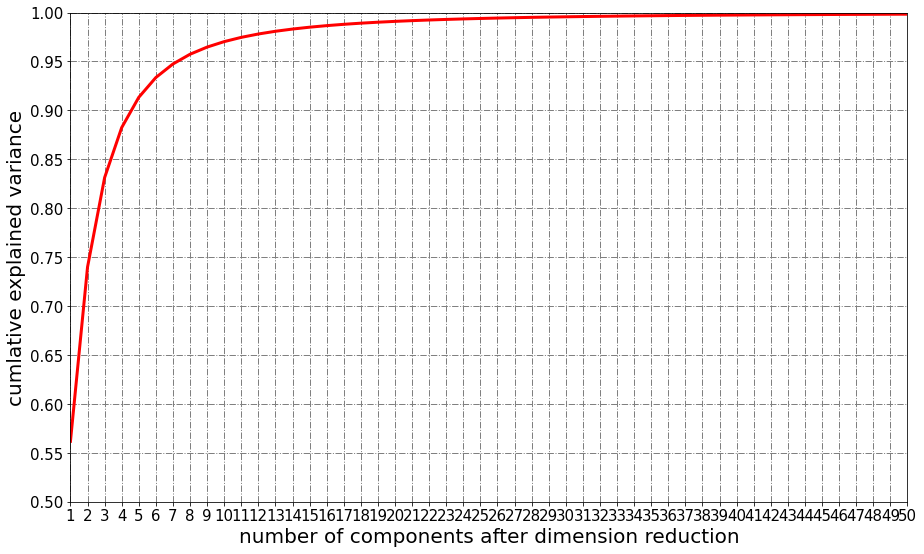

In [22]:
plt.figure(figsize=(15,9))
plt.plot(1+np.arange(50),np.cumsum(pca.explained_variance_ratio_),"r",MarkerSize=5,LineWidth=3.0)
plt.xticks(1+np.arange(50),fontsize=15)
plt.yticks(np.linspace(0.5,1,11),fontsize=15)
plt.xlim(1,50)
plt.ylim(0.5,1)
plt.xlabel("number of components after dimension reduction", fontdict={'size': 20})
plt.ylabel("cumlative explained variance", fontdict={'size': 20})
plt.grid(axis='both',color='grey',which='both',linestyle='-.',linewidth='1')
plt.show()

In [23]:
EVR[0]

0.5618094706893667

In [24]:
EVR_weight = EVR/Total_EVR
EVR_weight

array([5.62744503e-01, 1.78378974e-01, 9.15716278e-02, 5.12251263e-02,
       3.09716229e-02, 2.02849411e-02, 1.38413998e-02, 9.96662283e-03,
       7.32738522e-03, 5.60166607e-03, 4.36004839e-03, 3.44260219e-03,
       2.78676365e-03, 2.27513036e-03, 1.90462484e-03, 1.59155218e-03,
       1.36001117e-03, 1.15746421e-03, 9.90807156e-04, 8.61043569e-04,
       7.48597148e-04, 6.60250642e-04, 5.88206259e-04, 5.15619436e-04,
       4.63870224e-04, 4.16738466e-04, 3.75611931e-04, 3.37494819e-04,
       3.03481693e-04, 2.75714413e-04, 2.53233079e-04, 2.31671029e-04,
       2.10351623e-04, 1.95067221e-04, 1.79515499e-04, 1.67778935e-04,
       1.53638311e-04, 1.42379785e-04, 1.33027899e-04, 1.23226666e-04,
       1.14984599e-04, 1.08757560e-04, 1.01352317e-04, 9.51648236e-05,
       8.90748401e-05, 8.41788505e-05, 7.79766701e-05, 7.36990066e-05,
       6.95280958e-05, 6.58911143e-05])

In [25]:
EVR_weight.shape

(50,)

# Create dataset

In [26]:
img_train_path = img_path[:56000]
img_val_path = img_path[56000:]
img_train_path[500:505]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\00501.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\00502.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\00503.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\00504.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\20210803\\crack\\Inputpicture_withorder\\00505.bmp']

In [27]:
y_train = Y_dr[:56000,:]
y_val = Y_dr[56000:,:]
y_train.shape, y_val.shape

((56000, 50), (14110, 50))

In [28]:
Weighted_y_train = EVR_weight*y_train
Weighted_y_val = EVR_weight*y_val
Weighted_y_train.shape, Weighted_y_val.shape

((56000, 50), (14110, 50))

In [29]:
def read_bmp(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_bmp(img, channels=1)
    return img

In [30]:
def load_and_preprocess_image(path, label):
    image = read_bmp(path)   
    
    image = tf.cast(image, tf.float32) #change UF8 to float
    image = image/255
    return image, label

In [31]:
train_image_ds = tf.data.Dataset.from_tensor_slices((img_train_path, y_train))

In [32]:
val_image_ds = tf.data.Dataset.from_tensor_slices((img_val_path, y_val))

In [33]:
auto = tf.data.experimental.AUTOTUNE

In [34]:
train_image_ds = train_image_ds.map(load_and_preprocess_image, num_parallel_calls=auto)
val_image_ds = val_image_ds.map(load_and_preprocess_image, num_parallel_calls=auto) 

In [35]:
train_image_ds

<ParallelMapDataset shapes: ((None, None, 1), (50,)), types: (tf.float32, tf.float64)>

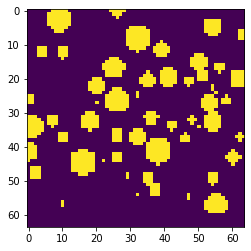

In [36]:
for img,label in train_image_ds.take(1):
    plt.imshow(img)

In [37]:
train_count = len(y_train)
train_count

56000

In [38]:
Batch_size = 32

In [39]:
#for model.fit
train_image_ds = train_image_ds.shuffle(train_count).batch(Batch_size)
train_image_ds = train_image_ds.prefetch(auto) #预取数据节约时间

In [40]:
val_image_ds = val_image_ds.batch(Batch_size)
val_image_ds = val_image_ds.prefetch(auto) #预取数据节约时间

In [41]:
# val_count = len(y_val)
# val_count

In [42]:
imgs, labels = next(iter(train_image_ds))

In [43]:
imgs.shape, labels.shape

(TensorShape([32, 64, 64, 1]), TensorShape([32, 50]))

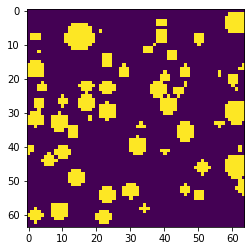

In [44]:
plt.imshow(imgs[0])

In [45]:
labels[0]

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([ 2.35283086e-01, -2.44367737e-01, -5.63473337e-02,  1.85366830e-02,
       -6.55706817e-04, -1.06371070e-02,  2.33874505e-02,  1.75267564e-02,
        1.53339479e-02, -6.32524552e-03,  3.74360899e-02,  2.42902099e-03,
       -3.92840078e-02,  1.62772733e-04, -2.19707632e-02, -7.56561467e-04,
       -4.23171140e-03,  1.58035958e-03, -7.34558593e-03,  9.98270329e-04,
       -6.31420223e-03, -6.29951493e-03, -6.33422747e-03,  6.38145556e-03,
        3.95790447e-03,  3.66173400e-03,  1.40866271e-03,  2.68415959e-03,
        6.01227511e-04,  2.66567286e-03,  6.61353525e-04,  5.66915768e-03,
        2.71437074e-03,  7.06759168e-03,  2.54372653e-03,  4.38727762e-03,
        1.95476072e-03, -5.29281886e-04, -5.52598356e-04,  6.04495771e-04,
        3.81784271e-04,  5.13384559e-04, -2.84396329e-03,  2.71219563e-04,
        4.78207072e-03, -2.61546463e-03, -2.31520707e-03,  2.85229016e-03,
       -4.43865772e-04, -9.91688463e-04])>

In [46]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(64,64,1),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(50)

])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        2

In [48]:
ls = tf.keras.losses.MeanSquaredError() #(y_true, y_pred)

In [49]:
# def loss_function(labels, pred):
#     pred1 = EVR_weight*pred
#     labels1 = EVR_weight*labels
#     loss_step = tf.keras.losses.MSE(labels1, pred1)
    
#     return loss_step

In [50]:
optimizer = tf.keras.optimizers.Adam()

In [51]:
# #define r_square
# def r_square(y_true, y_pred):
#     y_mean = np.mean(y_true)
#     SSE=np.sum((y_true-y_pred)**2)
#     SST=np.sum((y_true-y_mean)**2)
#     R_2=1-SSE/SST
#     return R_2

In [52]:
# r_square(np.array([1,1,1]), np.array([1,0.99,1]))

In [53]:
# epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
# # epoch_R2_avg = tf.keras.metrics.Mean('train_R2')

# epoch_loss_avg_val = tf.keras.metrics.Mean('val_loss')
# # epoch_R2_avg_val = tf.keras.metrics.Mean('test_R2')

In [54]:
# def train_step(model, images, labels):
#     with tf.GradientTape() as t:
#         pred = model(images)
#         loss_step = loss_function(labels, pred)
# #         R2_train = r_square(labels, pred)
    
        
#     grads = t.gradient(loss_step, model.trainable_variables)
#     optimizer.apply_gradients(zip(grads,model.trainable_variables))
#     epoch_loss_avg(loss_step)
# #     epoch_R2_avg(R2_train)

In [55]:
# def val_step(model, images, labels):
#     pred = model(images, training=False)
# #     pred1 = np.multiply(pred, EVR_weight)
# #     labels1 = np.multiply(labels, EVR_weight)
#     loss_step = loss_function(labels, pred)
# #     R2_test = r_square(labels, pred)
    
#     epoch_loss_avg_val(loss_step)
# #     epoch_R2_avg(R2_test)

In [56]:
# train_loss_results = []
# # train_R2 = []

# val_loss_results = []
# # test_R2 = []

In [57]:
# num_epochs = 50

In [58]:
# for epoch in range(num_epochs):
#     for imgs_, labels_ in train_image_ds:
#         train_step(model, imgs_, labels_)
# #         print('.', end='')
# #     print()
#     train_loss_results.append(epoch_loss_avg.result())
    
#     for imgs_, labels_ in val_image_ds:
#         val_step(model, imgs_, labels_)
#     val_loss_results.append(epoch_loss_avg_val.result())    
        
    
#     print('Epoch: {}: loss:{:.8f}, val_loss: {:.8f}'.format(
#         epoch+1,
#         epoch_loss_avg.result(),
# #         train_R2.result(),
#         epoch_loss_avg_val.result(),
# #         test_R2.result()
#     ))
    
#     epoch_loss_avg.reset_states()
# #     train_R2.reset_states()
#     epoch_loss_avg_val.reset_states()
# #     test_R2.reset_states()

In [59]:
# val_loss_results

In [60]:
# train_loss_results

In [61]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [62]:
history = model.fit(train_image_ds, epochs=100, validation_data= val_image_ds)

Epoch 1/100
1750/1750 [==============================] - 203s 116ms/step - loss: 0.0016 - mae: 0.0157 - val_loss: 0.0103 - val_mae: 0.0838
Epoch 2/100
1750/1750 [==============================] - 206s 118ms/step - loss: 7.0594e-04 - mae: 0.0119 - val_loss: 0.0020 - val_mae: 0.0314
Epoch 3/100
1750/1750 [==============================] - 206s 118ms/step - loss: 6.7389e-04 - mae: 0.0115 - val_loss: 0.0012 - val_mae: 0.0237
Epoch 4/100
1750/1750 [==============================] - 202s 116ms/step - loss: 6.5063e-04 - mae: 0.0112 - val_loss: 0.0011 - val_mae: 0.0215
Epoch 5/100
1750/1750 [==============================] - 206s 118ms/step - loss: 6.3027e-04 - mae: 0.0109 - val_loss: 0.0013 - val_mae: 0.0239
Epoch 6/100
1750/1750 [==============================] - 206s 118ms/step - loss: 6.1803e-04 - mae: 0.0108 - val_loss: 0.0017 - val_mae: 0.0252
Epoch 7/100
1750/1750 [==============================] - 206s 118ms/step - loss: 6.0408e-04 - mae: 0.0106 - val_loss: 0.0011 - val_mae: 0.0187
Epo

Epoch 55/100
1750/1750 [==============================] - 203s 116ms/step - loss: 2.2067e-04 - mae: 0.0079 - val_loss: 7.2076e-04 - val_mae: 0.0109
Epoch 56/100
1750/1750 [==============================] - 204s 117ms/step - loss: 2.1989e-04 - mae: 0.0078 - val_loss: 8.0410e-04 - val_mae: 0.0114
Epoch 57/100
1750/1750 [==============================] - 203s 116ms/step - loss: 2.1808e-04 - mae: 0.0078 - val_loss: 0.0011 - val_mae: 0.0124
Epoch 58/100
1750/1750 [==============================] - 208s 119ms/step - loss: 2.1474e-04 - mae: 0.0078 - val_loss: 8.6880e-04 - val_mae: 0.0117
Epoch 59/100
1750/1750 [==============================] - 208s 119ms/step - loss: 2.1256e-04 - mae: 0.0078 - val_loss: 7.7758e-04 - val_mae: 0.0112
Epoch 60/100
1750/1750 [==============================] - 206s 118ms/step - loss: 2.0985e-04 - mae: 0.0077 - val_loss: 7.7016e-04 - val_mae: 0.0111
Epoch 61/100
1750/1750 [==============================] - 206s 118ms/step - loss: 2.0608e-04 - mae: 0.0077 - val_los

In [63]:
# #define r_square  epoch==40
def r_square(y_true, y_pred):
    y_pred1 = tf.cast(y_pred,tf.float64)
    y_mean = np.mean(y_true,axis=0)
    SSE=np.sum((y_true-y_pred1)**2,axis=0)
    SST=np.sum((y_true-y_mean)**2,axis=0)
    R1=1-SSE/SST
    R2 = np.sum(EVR_weight*R1)
    R_2 = tf.convert_to_tensor(R2,name='R_2')
    return R_2

In [64]:
pred = model(imgs)
pred[2]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-4.30883355e-02, -4.20836285e-02,  2.50272490e-02,  4.07240689e-02,
       -4.53085192e-02, -1.58587713e-02,  2.22956249e-03,  2.14466592e-03,
        2.38262420e-03,  1.55465468e-03, -8.94777477e-04, -9.21613188e-04,
       -1.04316208e-03,  1.28010492e-04, -1.29526563e-03,  3.46283632e-04,
       -6.32903830e-04,  2.14942265e-04, -5.82998153e-04,  9.73351533e-04,
       -4.08770458e-04, -3.57348123e-04, -1.49566957e-04,  5.13016596e-04,
        6.80210127e-04, -8.94736964e-04,  1.60996907e-03,  4.86701261e-04,
       -6.52609742e-05,  5.28114731e-04,  9.13247350e-05,  1.18188764e-05,
       -1.09754605e-04, -7.84304226e-04,  1.29417138e-04,  6.25380490e-05,
       -2.60116882e-04, -3.14131379e-04,  4.09575528e-04, -7.27086881e-05,
       -4.68282320e-04, -5.33158134e-04, -3.18657083e-04, -6.06916612e-04,
       -3.22951702e-04, -3.81902937e-04,  8.42873356e-04, -4.78955131e-04,
        7.51403131e-05,  4.38436284e-04], dtype=float

In [65]:
labels[2]

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([-2.57708811e-02, -6.58571368e-02,  1.69810878e-02,  6.72402330e-02,
       -3.76846962e-02,  2.50760964e-03,  2.76460670e-02,  9.04171295e-03,
       -1.28370108e-02, -8.46646303e-03,  5.60463488e-03,  7.98004707e-03,
       -1.49082811e-02,  1.81113775e-03, -1.03427039e-02,  8.82014252e-03,
       -5.98133826e-03,  1.04913610e-02, -2.09087751e-03, -6.06720315e-03,
       -5.11861806e-03, -2.47090625e-03, -4.74425006e-03,  3.69088859e-03,
        2.13550168e-03,  7.84304369e-03, -4.01076791e-03,  3.12915752e-03,
       -3.96496805e-03, -3.47392082e-03,  5.64694121e-03,  2.99321742e-03,
        1.46634853e-03,  1.73535505e-03, -2.75987264e-04,  3.13975342e-03,
       -4.45040549e-03,  5.06997435e-04,  3.95684365e-03,  1.92724238e-03,
       -2.83860026e-03, -3.57210265e-03,  3.89685738e-05,  2.84203058e-03,
        1.24850198e-03, -8.52514568e-04, -2.03167112e-03, -9.18847650e-04,
       -1.09425891e-03,  2.60901696e-03])>

In [66]:
# pred1 = pred/EVR_weight

In [67]:
r_square(labels, pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.8009004864985331>

In [68]:
# labels[1]

In [69]:
# labels1 = labels/EVR_weight
# labels1

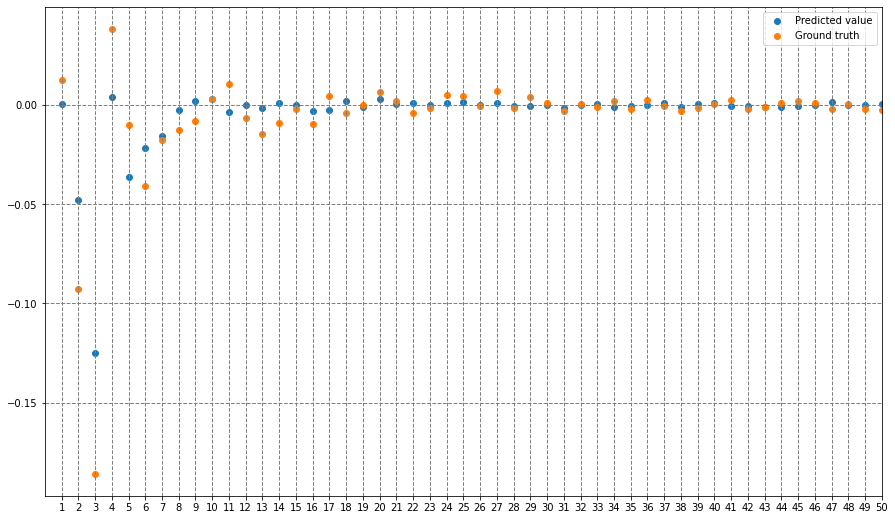

In [70]:
plt.figure(figsize=(15,9))
plt.scatter(np.arange(50)+1, pred[20],label='Predicted value')
plt.scatter(np.arange(50)+1, labels[20],label='Ground truth')

# plt.ylim(-0.06,0.06)
plt.xlim(0,50)
plt.xticks(np.arange(50)+1)
plt.legend()
plt.grid(axis='both',color='grey',which='both',linestyle='--',linewidth='1')

In [71]:
pca=PCA(n_components=50)#实例化
pca=pca.fit(Y)#拟合模型
Y_dr=pca.transform(Y)#获取降维后的新矩阵

Y_pred = pca.inverse_transform(pred)
Y_true = pca.inverse_transform(labels)

In [72]:
Y_pred.shape

(32, 501)

In [73]:
Y_true.shape

(32, 501)

<ipython-input-74-1e86d2233e5a>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_pred[0],label='Predicted curve-1',color='red',LineWidth=4.0)
<ipython-input-74-1e86d2233e5a>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_true[0],label='Actual curve-1',color='coral',LineWidth=4.0)
<ipython-input-74-1e86d2233e5a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_pred[1],label='Predicted curve-2',color='blue',LineWidth=4.0)
<ipython-input-74-1e86d2233e5a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_true[1],label='Ac

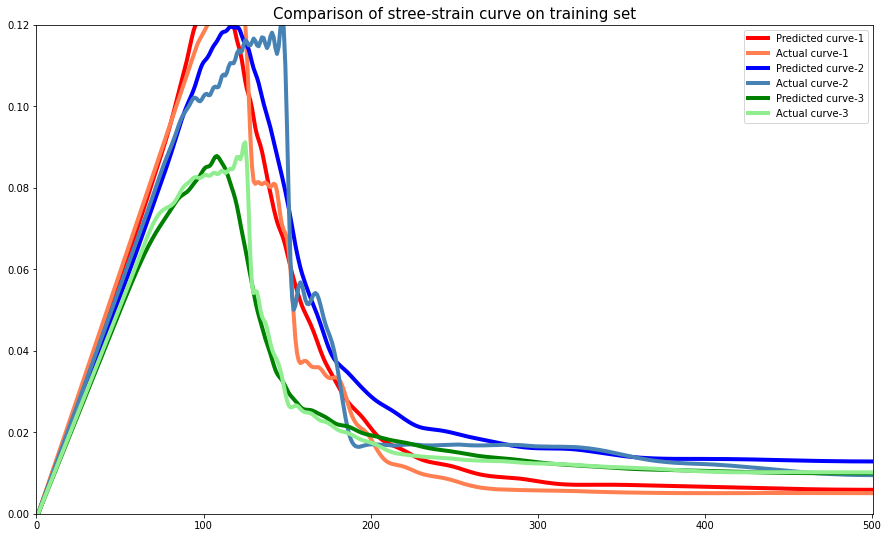

In [74]:
plt.figure(figsize=(15,9))
plt.plot(np.arange(501)+1, Y_pred[0],label='Predicted curve-1',color='red',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true[0],label='Actual curve-1',color='coral',LineWidth=4.0)

plt.plot(np.arange(501)+1, Y_pred[1],label='Predicted curve-2',color='blue',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true[1],label='Actual curve-2',color='steelblue',LineWidth=4.0)

plt.plot(np.arange(501)+1, Y_pred[2],label='Predicted curve-3',color='green',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true[2],label='Actual curve-3',color='lightgreen',LineWidth=4.0)

plt.ylim(0,0.12)
plt.xlim(0,501)
plt.title('Comparison of stree-strain curve on training set',fontdict={'size':15})
plt.legend()
# plt.grid(axis='x',color='grey',which='both',linestyle='--',linewidth='1')

In [75]:
val_imgs, val_labels = next(iter(val_image_ds))

In [76]:
pred_val = model(val_imgs)
pred_val[2]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-4.9844708e-02,  2.1344896e-01,  3.6139548e-02, -2.1604425e-04,
       -4.3730102e-02, -1.3514338e-03, -4.5126737e-03, -8.3063683e-03,
       -8.6968793e-03, -9.0061985e-03,  8.8528758e-03, -7.4989409e-03,
        4.8321821e-03, -4.8148511e-03, -4.0304139e-03,  5.4361629e-03,
        1.1032990e-03, -3.2781060e-03,  2.5350542e-03, -2.5734170e-03,
       -1.0114105e-03, -2.6661756e-03,  1.6362969e-03, -2.0949331e-03,
       -1.0778691e-04, -2.3171440e-04,  1.0051557e-03,  4.2067200e-04,
        6.0816371e-04,  1.3374074e-03,  1.6480603e-03,  7.0082513e-04,
       -4.4598547e-04, -1.4831235e-04,  9.4548147e-04,  2.8629458e-04,
       -9.5814187e-04, -2.5041495e-04,  6.1195740e-04, -3.9653364e-04,
        1.4293136e-04, -1.0231681e-03, -1.3990448e-04,  2.1809479e-04,
       -1.0656461e-04, -8.0787792e-04,  2.7361000e-04, -7.6102070e-04,
        5.4686400e-04,  3.6538081e-04], dtype=float32)>

In [77]:
val_labels[2]

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([-2.35271261e-01,  9.74797746e-02, -2.39866658e-02, -1.05997232e-02,
       -6.71844455e-03, -5.54825663e-03,  1.08248010e-02,  8.58930021e-03,
        1.04623303e-02,  2.53254127e-02, -4.97646618e-04,  7.46900949e-03,
        8.00532363e-03, -1.18427326e-02, -1.09875379e-02,  9.15624851e-03,
        1.31427793e-02, -5.02001780e-03,  9.90518196e-03, -6.65026499e-03,
       -4.83562868e-03, -5.26787822e-03,  4.99987833e-03, -4.76602847e-04,
        4.92187380e-03, -2.51218808e-03,  1.45129271e-03,  2.59511329e-03,
       -5.85129380e-03,  2.54721269e-03, -8.06613622e-04, -3.25959716e-03,
       -2.05661863e-03,  3.56582641e-03, -2.79466246e-03, -1.72065768e-03,
        3.91521585e-03,  5.04374411e-04, -1.46079880e-03,  6.56574319e-06,
       -3.17231485e-03,  1.64474866e-03,  3.06700542e-04, -2.39806803e-05,
        1.00079984e-03, -1.60513806e-03, -1.95909357e-03, -7.29599520e-04,
        1.95485119e-03,  6.11882176e-04])>

In [78]:
r_square(val_labels, pred_val)

<tf.Tensor: shape=(), dtype=float64, numpy=0.158276495607135>

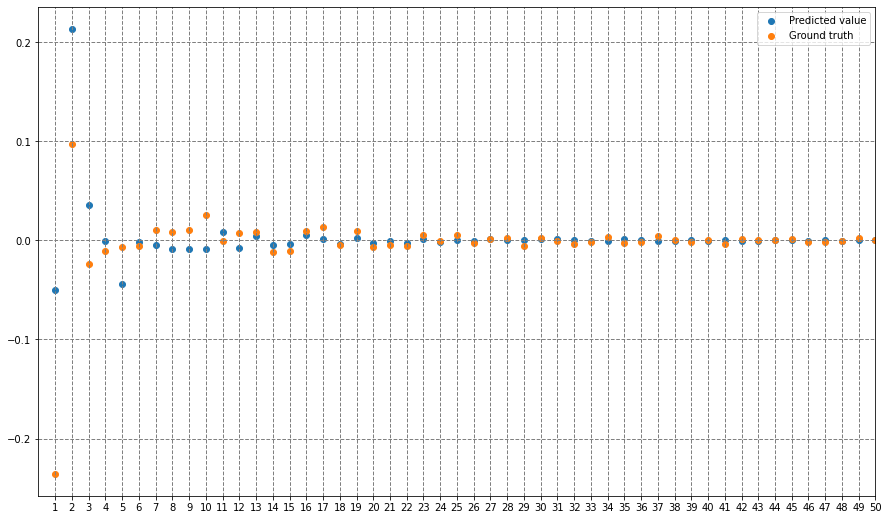

In [79]:
plt.figure(figsize=(15,9))
plt.scatter(np.arange(50)+1, pred_val[2],label='Predicted value')
plt.scatter(np.arange(50)+1, val_labels[2],label='Ground truth')

# plt.ylim(-0.06,0.06)
plt.xlim(0,50)
plt.xticks(np.arange(50)+1)
plt.legend()
plt.grid(axis='both',color='grey',which='both',linestyle='--',linewidth='1')

In [80]:
pca=PCA(n_components=50)#实例化
pca=pca.fit(Y)#拟合模型
Y_dr=pca.transform(Y)#获取降维后的新矩阵

Y_pred_val = pca.inverse_transform(pred_val)
Y_true_val = pca.inverse_transform(val_labels)

<ipython-input-81-68cffa465210>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_pred_val[0],label='Predicted curve-1',color='r',LineWidth=4.0)
<ipython-input-81-68cffa465210>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_true_val[0],label='Actual curve-1',color='coral',LineWidth=4.0)
<ipython-input-81-68cffa465210>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_pred_val[1],label='Predicted curve-2',color='b',LineWidth=4.0)
<ipython-input-81-68cffa465210>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.arange(501)+1, Y_true_val[1

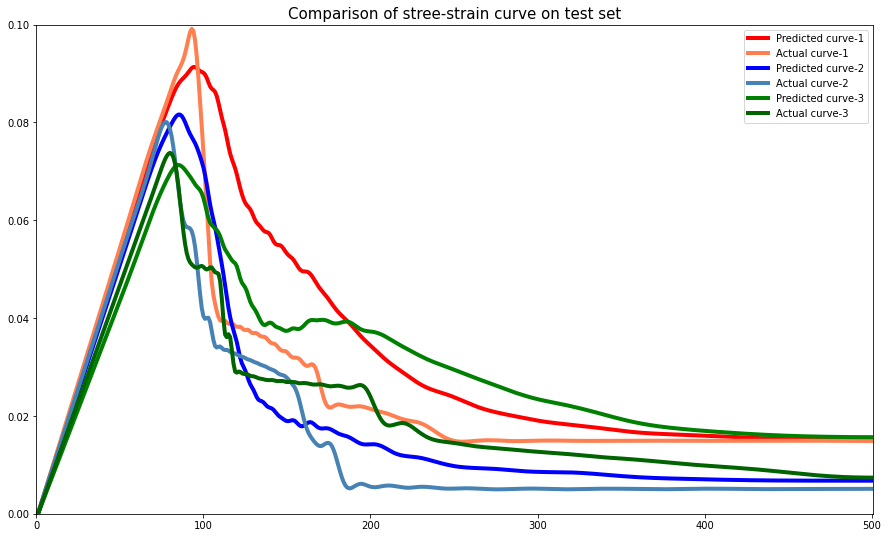

In [81]:
plt.figure(figsize=(15,9))
plt.plot(np.arange(501)+1, Y_pred_val[0],label='Predicted curve-1',color='r',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true_val[0],label='Actual curve-1',color='coral',LineWidth=4.0)

plt.plot(np.arange(501)+1, Y_pred_val[1],label='Predicted curve-2',color='b',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true_val[1],label='Actual curve-2',color='steelblue',LineWidth=4.0)

plt.plot(np.arange(501)+1, Y_pred_val[2],label='Predicted curve-3',color='g',LineWidth=4.0)
plt.plot(np.arange(501)+1, Y_true_val[2],label='Actual curve-3',color='darkgreen',LineWidth=4.0)

plt.ylim(0,0.1)
plt.xlim(0,501)
plt.title('Comparison of stree-strain curve on test set',fontdict={'size':15})
plt.legend()

In [82]:
model.save('./model.h5')